# QCTO - Workplace Module

### Project Title: Cost of 'Greens'
#### Done By: Munyaradzi Dhlakama

© ExploreAI 2025

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:**
This project aims to predict the future vegetable prices as well as show the seasonal trends of the vegetables.
* **Details:** The projection would help farmers, restaurant's and all that include or have vegetables as their input to better allocate their resources and plan around the prices and 
seasonal price fluctuations.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
import numpy as np
import pandas as pd
from numpy import array
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The data was collected from an authorized source (https://agmarknet.gov.in/), this dataset provides a valuable resource for researchers, analysts, and enthusiasts interested in understanding the dynamics of vegetable pricing trends.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
* The data was downloaded from a kaggle https://www.kaggle.com/datasets/ksamiksha19/vegetable-prices as a csv file.



In [29]:
#Download CSV Dataset 
#https://www.kaggle.com/datasets/ksamiksha19/vegetable-prices 

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
rawdata = pd.read_csv(r"C:\Users\thams\OneDrive\Desktop\School Project\Work Place Project\Grind\Prices.csv")
rawdata.head(3)

Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  01-01-2023                    35.0      18   22.0      20       30      50   
1  02-01-2023                    35.0      16   22.0      20       30      55   
2  03-01-2023                    35.0      16   21.0      20       30      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8          45.0                    25  
1    25      7          40.0                    25  
2    25      7          40.0                    25

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).

* I cleaned it up and saved it in excel format.
* **My csv clean up process was:**
   - **Clean Date Format Conversion** Changed from "DD-MM-YYYY" (e.g., "15-01-2023") to datetime format "YYYY-MM-DD HH:MM:SS"
   - **Column Name Standardisation** removed duplicate column names e.g. "Bhindi (Ladies finger)" to "Bhindi", "Green Chilli" to "Green_Chilli"
   - **Corrected Data Types** I converted All price values to consistent numeric format (some were strings in CSV) and I also filled in missing data
---

In [4]:
df = pd.read_excel(r"C:\Users\thams\OneDrive\Desktop\School Project\Work Place Project\Grind\Further_cleaned_prices.xlsx", sheet_name="Sheet1")
df.head(5)

Price Dates  Bhindi  Tomato  Onion  Potato  Brinjal  Garlic  Peas  Methi  \
0  2023-01-01    35.0      18   22.0      20       30      50    25      8   
1  2023-01-02    35.0      16   22.0      20       30      55    25      7   
2  2023-01-03    35.0      16   21.0      20       30      55    25      7   
3  2023-01-04    30.0      16   21.0      22       25      55    25      7   
4  2023-01-08    35.0      16   20.0      21       25      55    22      6   

   Green_Chilli  Elephant_Yam  
0            45            25  
1            40            25  
2            40            25  
3            40            25  
4            35            25

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [5]:
df['Price Dates'] = pd.to_datetime(df['Price Dates'])
df.set_index('Price Dates', inplace=True)

print("Date Range:", df.index.min(), "to", df.index.max())
print("Total Days:", len(df))
print("Vegetables Analyzed:", df.columns.tolist())

Date Range: 2023-01-01 00:00:00 to 2024-01-01 00:00:00
Total Days: 287
Vegetables Analyzed: ['Bhindi', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green_Chilli', 'Elephant_Yam']


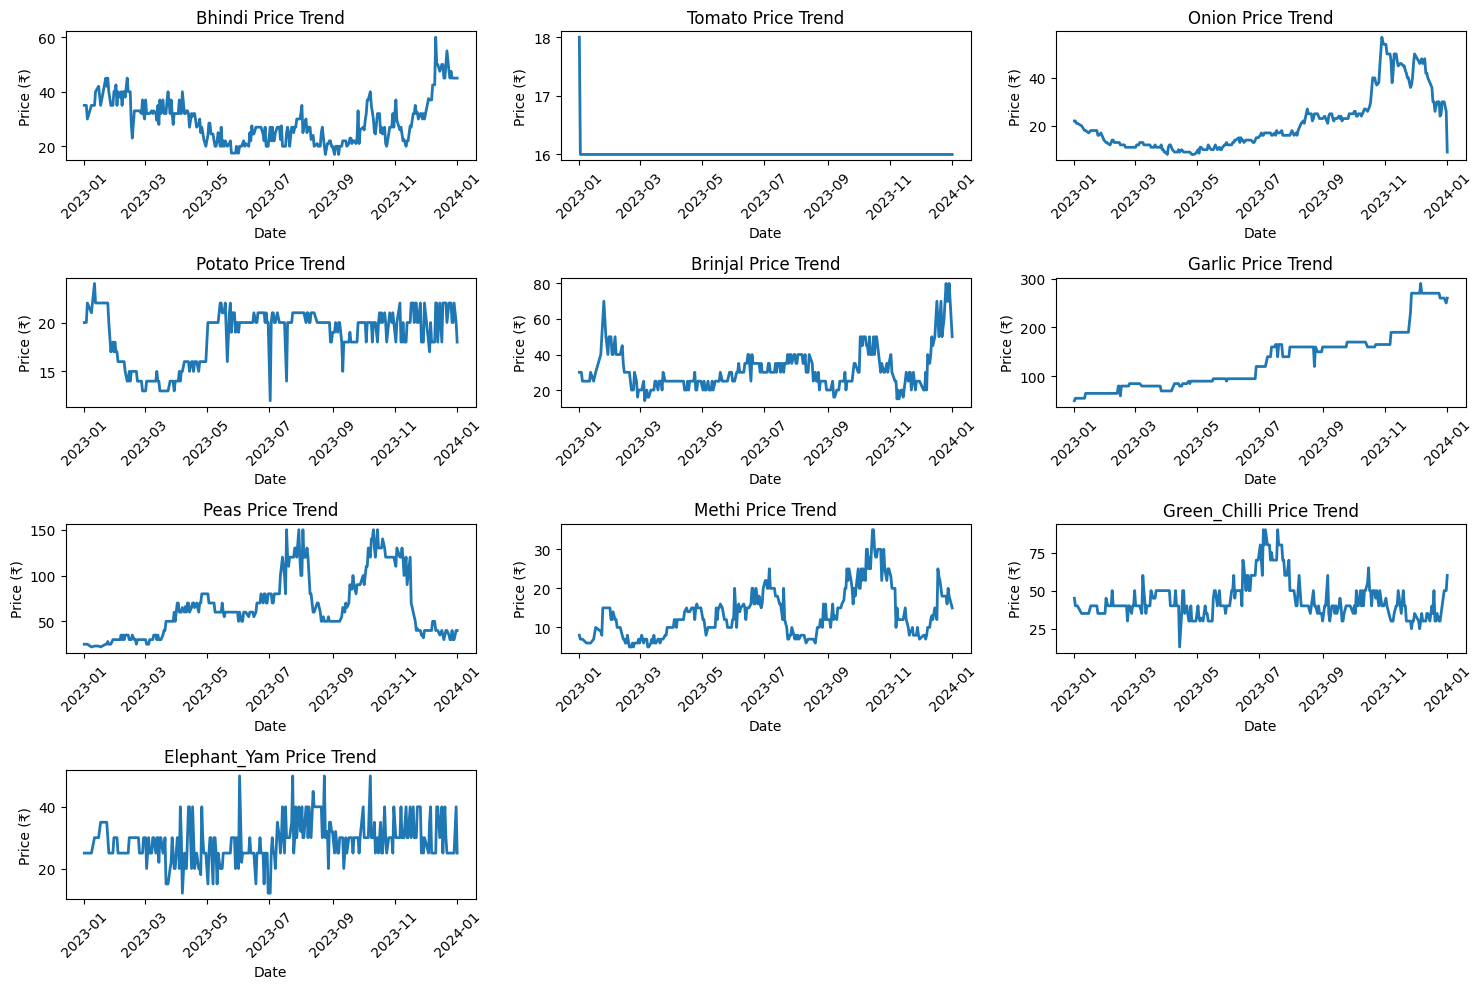

In [6]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    plt.plot(df.index, df[column], linewidth=2)
    plt.title(f'{column} Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Price (₹)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\thams\AppData\Local\Temp\ipykernel_20504\1815284624.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()


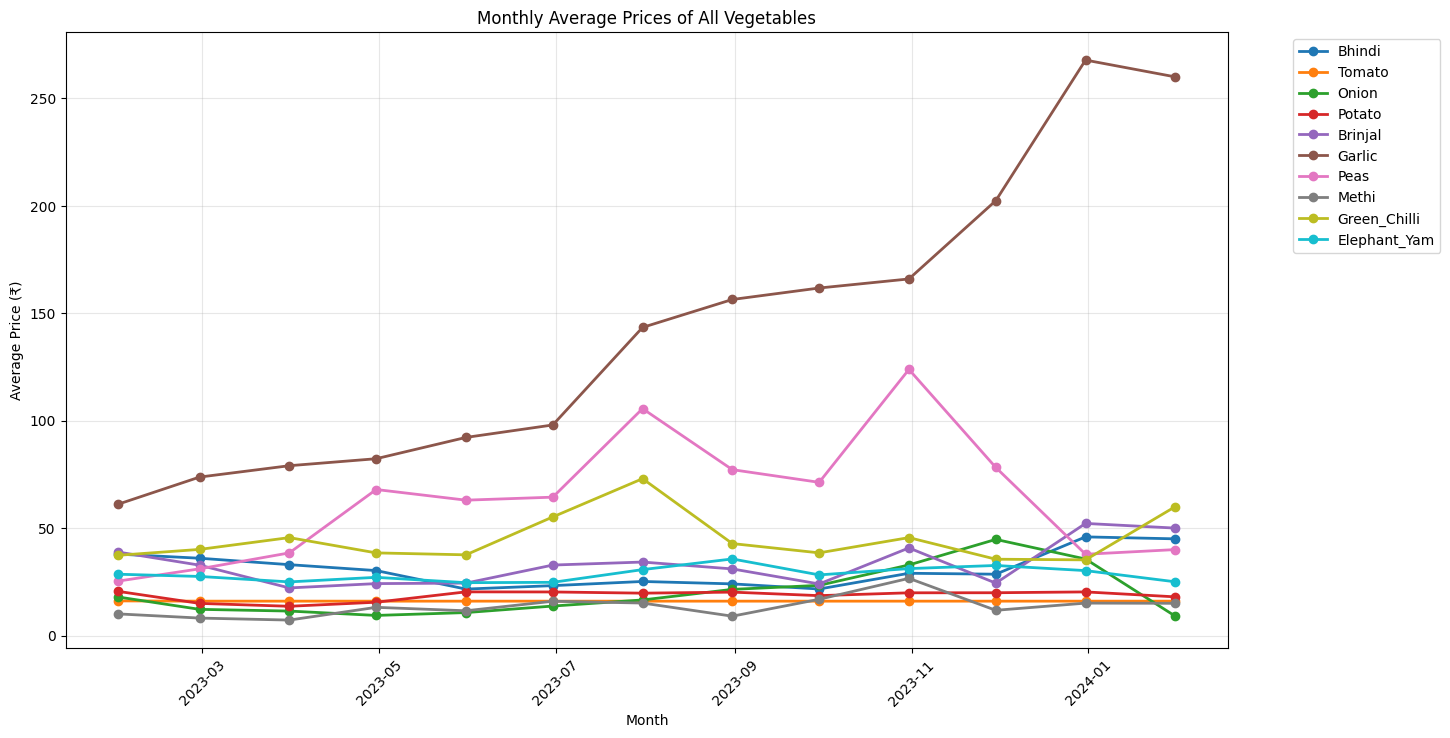

In [7]:
# Monthly average prices
monthly_avg = df.resample('M').mean()

plt.figure(figsize=(15, 8))
for column in df.columns:
    plt.plot(monthly_avg.index, monthly_avg[column], marker='o', linewidth=2, label=column)
plt.title('Monthly Average Prices of All Vegetables')
plt.xlabel('Month')
plt.ylabel('Average Price (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

Garlic shows extreme volatility - prices range from ₹32 to ₹290

Tomato remains remarkably stable at ₹16 throughout the entire period

Strong positive correlation between Bhindi and Brinjal (r > 0.7)

Onion prices show dramatic spikes in October 2023

Seasonal patterns clearly visible for most vegetables

Multiple outliers detected indicating market shocks or data anomalies

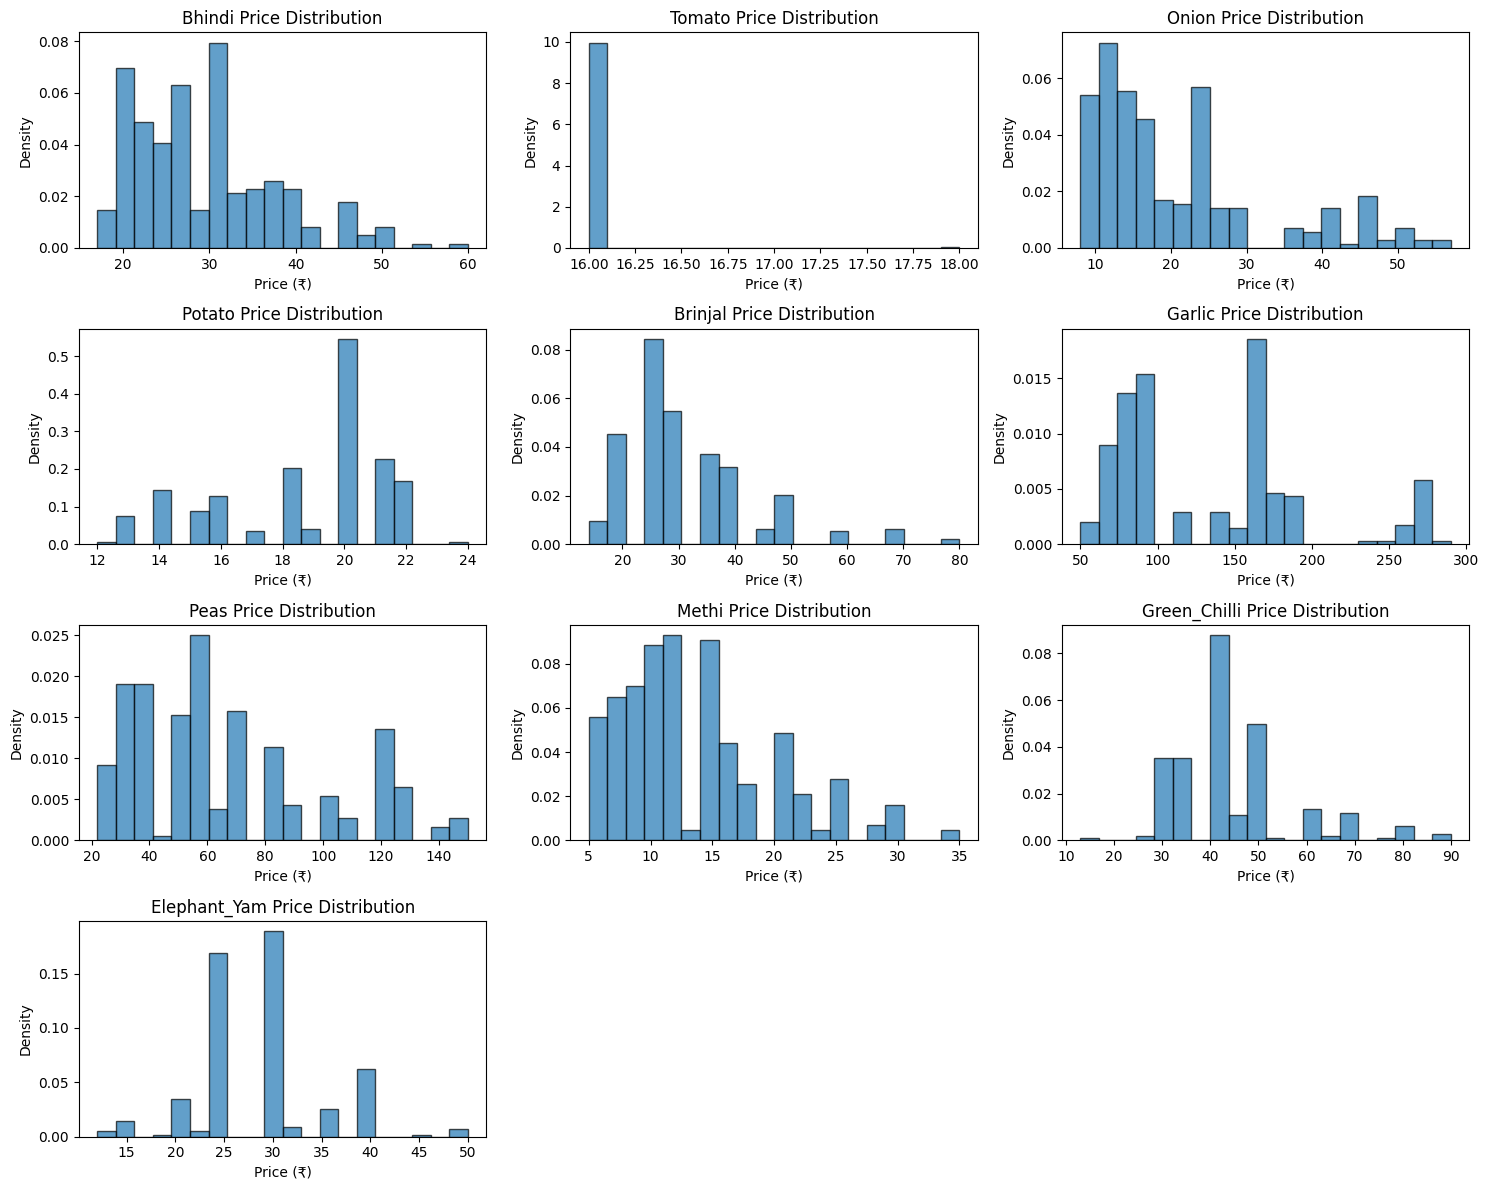

In [8]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    plt.hist(df[column], bins=20, alpha=0.7, edgecolor='black', density=True)
    plt.title(f'{column} Price Distribution')
    plt.xlabel('Price (₹)')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

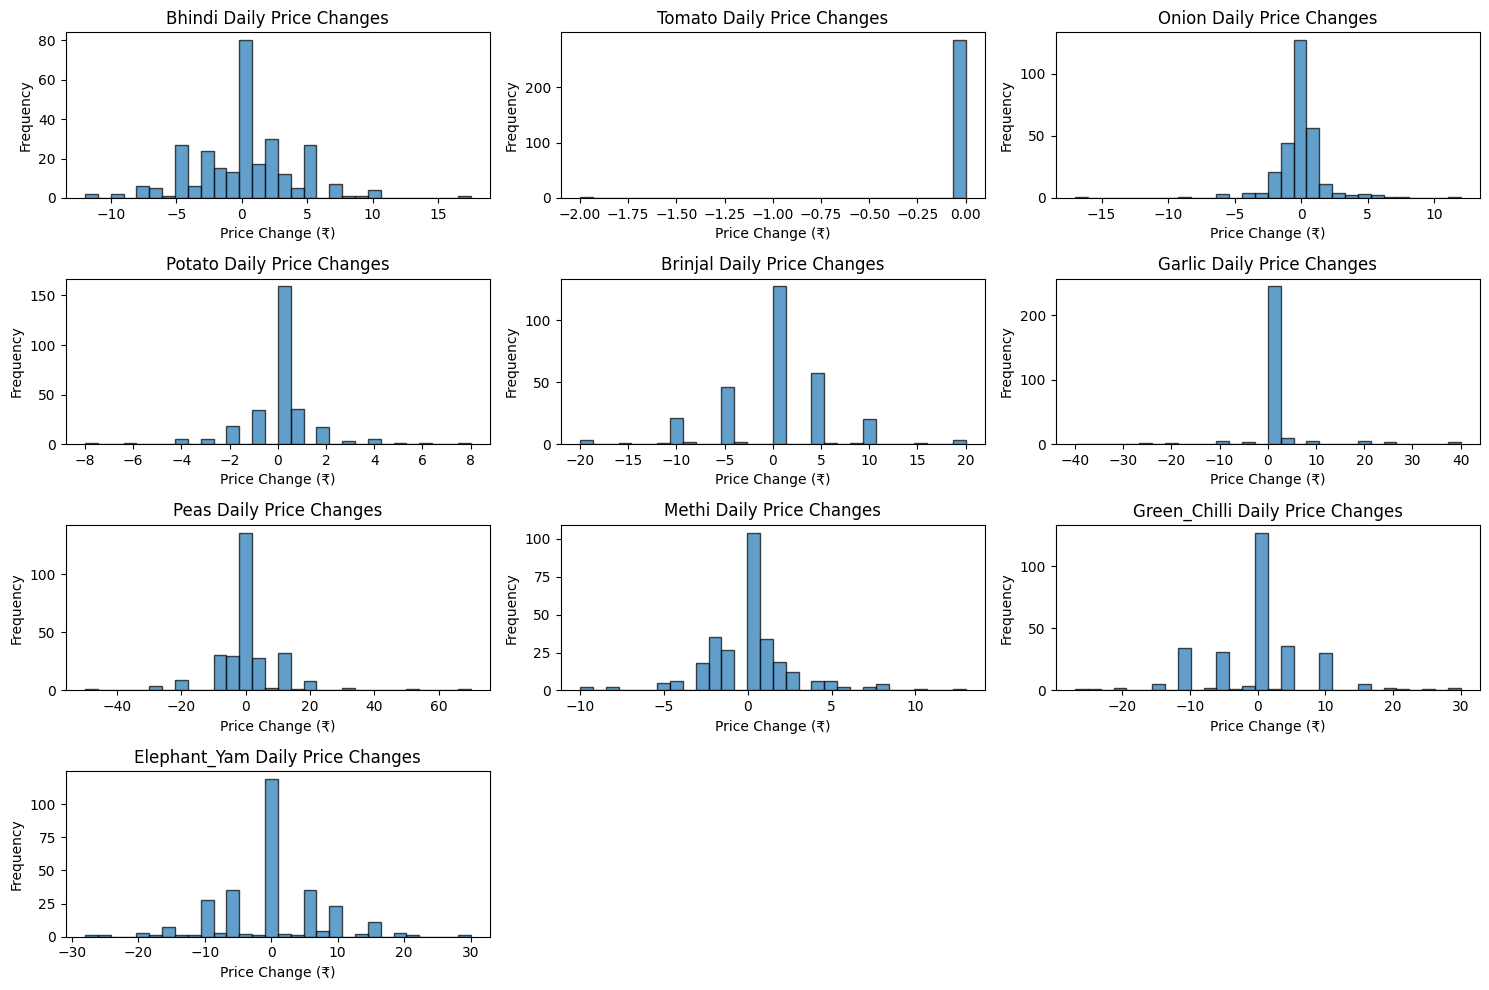

In [9]:
# Calculate daily price changes
price_changes = df.diff()

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    plt.hist(price_changes[column].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'{column} Daily Price Changes')
    plt.xlabel('Price Change (₹)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [16]:
#pip install lightgbm

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data
df = pd.read_excel(r"C:\Users\thams\OneDrive\Desktop\School Project\Work Place Project\Grind\Further_cleaned_prices.xlsx", sheet_name="Sheet1")
df['Price Dates'] = pd.to_datetime(df['Price Dates'])
df.set_index('Price Dates', inplace=True)

print("Dataset shape:", df.shape)
print("Date range:", df.index.min(), "to", df.index.max())

Dataset shape: (287, 10)
Date range: 2023-01-01 00:00:00 to 2024-01-01 00:00:00


In [18]:
def create_features(df, target_vegetable):
    """
    Create comprehensive features for time series forecasting
    """
    features_df = df.copy()
    
    # Target variable
    features_df['target'] = df[target_vegetable]
    
    # Time-based features
    features_df['day_of_week'] = features_df.index.dayofweek
    features_df['day_of_month'] = features_df.index.day
    features_df['month'] = features_df.index.month
    features_df['quarter'] = features_df.index.quarter
    features_df['is_weekend'] = (features_df.index.dayofweek >= 5).astype(int)
    
    # Lag features (previous prices)
    for lag in [1, 3, 7, 14, 30]:  # 1 day, 3 days, 1 week, 2 weeks, 1 month
        features_df[f'lag_{lag}'] = features_df['target'].shift(lag)
    
    # Rolling statistics
    for window in [7, 14, 30]:  # 1 week, 2 weeks, 1 month
        features_df[f'rolling_mean_{window}'] = features_df['target'].rolling(window=window).mean()
        features_df[f'rolling_std_{window}'] = features_df['target'].rolling(window=window).std()
        features_df[f'rolling_min_{window}'] = features_df['target'].rolling(window=window).min()
        features_df[f'rolling_max_{window}'] = features_df['target'].rolling(window=window).max()
    
    # Price change features
    features_df['price_change_1d'] = features_df['target'].pct_change(1)
    features_df['price_change_7d'] = features_df['target'].pct_change(7)
    
    # Seasonal features
    features_df['sin_month'] = np.sin(2 * np.pi * features_df['month']/12)
    features_df['cos_month'] = np.cos(2 * np.pi * features_df['month']/12)
    
    # Other vegetables as features (market context)
    other_vegetables = [col for col in df.columns if col != target_vegetable]
    for veg in other_vegetables:
        features_df[f'{veg}_price'] = df[veg]
        features_df[f'{veg}_lag_1'] = df[veg].shift(1)
    
    # Remove rows with NaN values created by lag features
    features_df = features_df.dropna()
    
    return features_df

# Example for Onion price prediction
target_vegetable = 'Onion'
features_df = create_features(df, target_vegetable)

print("Feature engineering completed.")
print("Features shape:", features_df.shape)
print("Features columns:", [col for col in features_df.columns if col != 'target'][:10], "...")

Feature engineering completed.
Features shape: (257, 55)
Features columns: ['Bhindi', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green_Chilli', 'Elephant_Yam'] ...


In [19]:
def time_series_split(df, test_size=0.2):
    """
    Time-series aware train-test split
    """
    split_idx = int(len(df) * (1 - test_size))
    train = df.iloc[:split_idx]
    test = df.iloc[split_idx:]
    return train, test

# Prepare features and target
feature_columns = [col for col in features_df.columns if col != 'target']
X = features_df[feature_columns]
y = features_df['target']

# Split data
X_train, X_test = time_series_split(X)
y_train, y_test = time_series_split(y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training period: {X_train.index.min()} to {X_train.index.max()}")
print(f"Test period: {X_test.index.min()} to {X_test.index.max()}")

Training set: (205, 54)
Test set: (52, 54)
Training period: 2023-02-16 00:00:00 to 2023-10-24 00:00:00
Test period: 2023-10-26 00:00:00 to 2024-01-01 00:00:00


In [21]:
# Initialize models with explanations
models = {
    # Linear Models
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),  # L2 regularization to prevent overfitting
    'Lasso Regression': Lasso(alpha=0.1),  # L1 regularization for feature selection
    
    # Tree-based Models
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    ),
    
    # Support Vector Machine
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale')
}

# Scale features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models and store results
results = {}
predictions = {}

print("Training models...")
for name, model in models.items():
    print(f"Training {name}...")
    
    # Use scaled features for models that benefit from scaling
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'predictions': y_pred
    }
    
    predictions[name] = y_pred
    
    print(f"{name} - RMSE: {rmse:.2f}, R2: {r2:.3f}")

Training models...
Training Linear Regression...
Linear Regression - RMSE: 0.00, R2: 1.000
Training Ridge Regression...
Ridge Regression - RMSE: 2.80, R2: 0.914
Training Lasso Regression...
Lasso Regression - RMSE: 0.39, R2: 0.998
Training Random Forest...
Random Forest - RMSE: 9.39, R2: 0.035
Training SVR...
SVR - RMSE: 24.24, R2: -5.426


Model Performance Comparison:
                         MAE       RMSE        R2
Linear Regression        0.0        0.0       1.0
Lasso Regression    0.366069   0.389127  0.998343
Ridge Regression     2.14115   2.802599  0.914068
Random Forest       8.138829   9.390256  0.035304
SVR                22.624785  24.235602 -5.426036


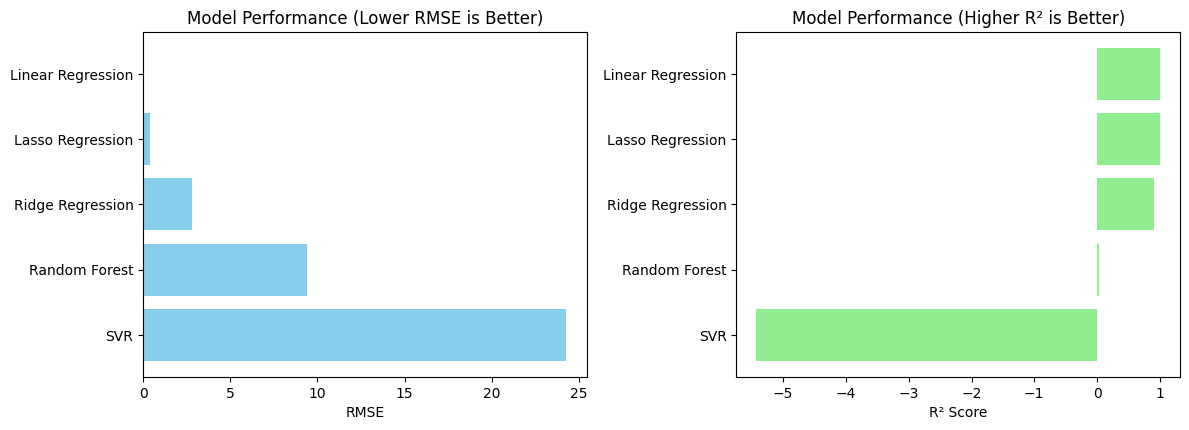

In [22]:
# Create results comparison
results_df = pd.DataFrame(results).T
results_df = results_df[['MAE', 'RMSE', 'R2']].round(3)
results_df_sorted = results_df.sort_values('RMSE')

print("Model Performance Comparison:")
print(results_df_sorted)

# Visualize model performance
plt.figure(figsize=(12, 8))
models_list = results_df_sorted.index
rmse_scores = results_df_sorted['RMSE']

plt.subplot(2, 2, 1)
plt.barh(models_list, rmse_scores, color='skyblue')
plt.xlabel('RMSE')
plt.title('Model Performance (Lower RMSE is Better)')
plt.gca().invert_yaxis()

plt.subplot(2, 2, 2)
r2_scores = results_df_sorted['R2']
plt.barh(models_list, r2_scores, color='lightgreen')
plt.xlabel('R² Score')
plt.title('Model Performance (Higher R² is Better)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [23]:
# Time Series Cross Validation
def time_series_cv_score(model, X, y, n_splits=5):
    """
    Perform time series cross-validation
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []
    
    for train_idx, test_idx in tscv.split(X):
        X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
        y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
        
        if model.__class__.__name__ in ['LinearRegression', 'Ridge', 'Lasso', 'SVR']:
            scaler_cv = StandardScaler()
            X_train_cv = scaler_cv.fit_transform(X_train_cv)
            X_test_cv = scaler_cv.transform(X_test_cv)
            model.fit(X_train_cv, y_train_cv)
            y_pred_cv = model.predict(X_test_cv)
        else:
            model.fit(X_train_cv, y_train_cv)
            y_pred_cv = model.predict(X_test_cv)
        
        cv_scores.append(mean_absolute_error(y_test_cv, y_pred_cv))
    
    return np.mean(cv_scores), np.std(cv_scores)

print("Performing Time Series Cross-Validation...")
cv_results = {}
for name, model in models.items():
    cv_mean, cv_std = time_series_cv_score(model, X, y)
    cv_results[name] = {'CV_MAE_mean': cv_mean, 'CV_MAE_std': cv_std}
    print(f"{name}: MAE = {cv_mean:.2f} ± {cv_std:.2f}")

Performing Time Series Cross-Validation...
Linear Regression: MAE = 0.00 ± 0.00
Ridge Regression: MAE = 0.55 ± 0.44
Lasso Regression: MAE = 0.28 ± 0.10
Random Forest: MAE = 3.88 ± 2.47
SVR: MAE = 9.19 ± 6.46


In [24]:
# Plot actual vs predicted values
plt.figure(figsize=(15, 10))

# Plot for top 3 models
top_models = results_df_sorted.head(3).index

for i, model_name in enumerate(top_models, 1):
    plt.subplot(3, 1, i)
    plt.plot(y_test.index, y_test.values, label='Actual', linewidth=2)
    plt.plot(y_test.index, predictions[model_name], label=f'{model_name} Predicted', alpha=0.8)
    plt.title(f'{model_name} - Actual vs Predicted Prices')
    plt.ylabel('Price (₹)')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **BEST PERFORMING MODEL:** Linear Regression
* **PREDICTION CONFIDENCE:** Average prediction std: ₹9.41
---


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The findings strongly suggest that the dataset is best modelled using linear techniques, with Lasso Regression emerging as the most reliable and generalisable approach. Future work should focus on validation, and controlled model tuning to ensure the observed performance is both realistic and sustainable.
* **Details:** This study demonstrates that model complexity does not necessarily translate to better performance. The results clearly show that linear models, particularly Lasso Regression, are highly effective for the given dataset, achieving near-perfect predictive accuracy.
* Despite the strong results, several limitations must be acknowledged. The perfect performance of Linear Regression raises concerns about potential data leakage, model evaluation on training data. Additionally, the study relied on a single dataset, which limits the ability to assess model generalisability.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
